In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
# The GTRSB dataset was downloaded from the link https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
#for ease of usage, the CSV's were uploaded onto personal google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the csv from the dataset

import pandas as pd
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Test.csv')
meta_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Meta.csv')
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Train.csv')
data='/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/'

In [ ]:
#Cross-verification of data
train_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
#Cross-verification of data
meta_data.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [ ]:
#Cross-verification of data
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
#Cross-verification of the number of images in the training ,test sets
a=len(test_data)
b=len(train_data)
print('The number of images in the training set is',b)
print('The number of images in the test set is',a)
print('The total number of images is',a+b)
print('The total number of categories is',len(train_data.ClassId.value_counts()))

The number of images in the training set is 39209
The number of images in the test set is 12630
The total number of images is 51839
The total number of categories is 43


In [ ]:
# Reading the random image sizes to get an estimation

import cv2

sample1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Train/0/00000_00000_00004.png')
sample2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Train/0/00000_00001_00004.png')

print('Size of image:', sample1.shape)
print('Size of image:', sample2.shape)


Size of image: (32, 30, 3)
Size of image: (31, 31, 3)


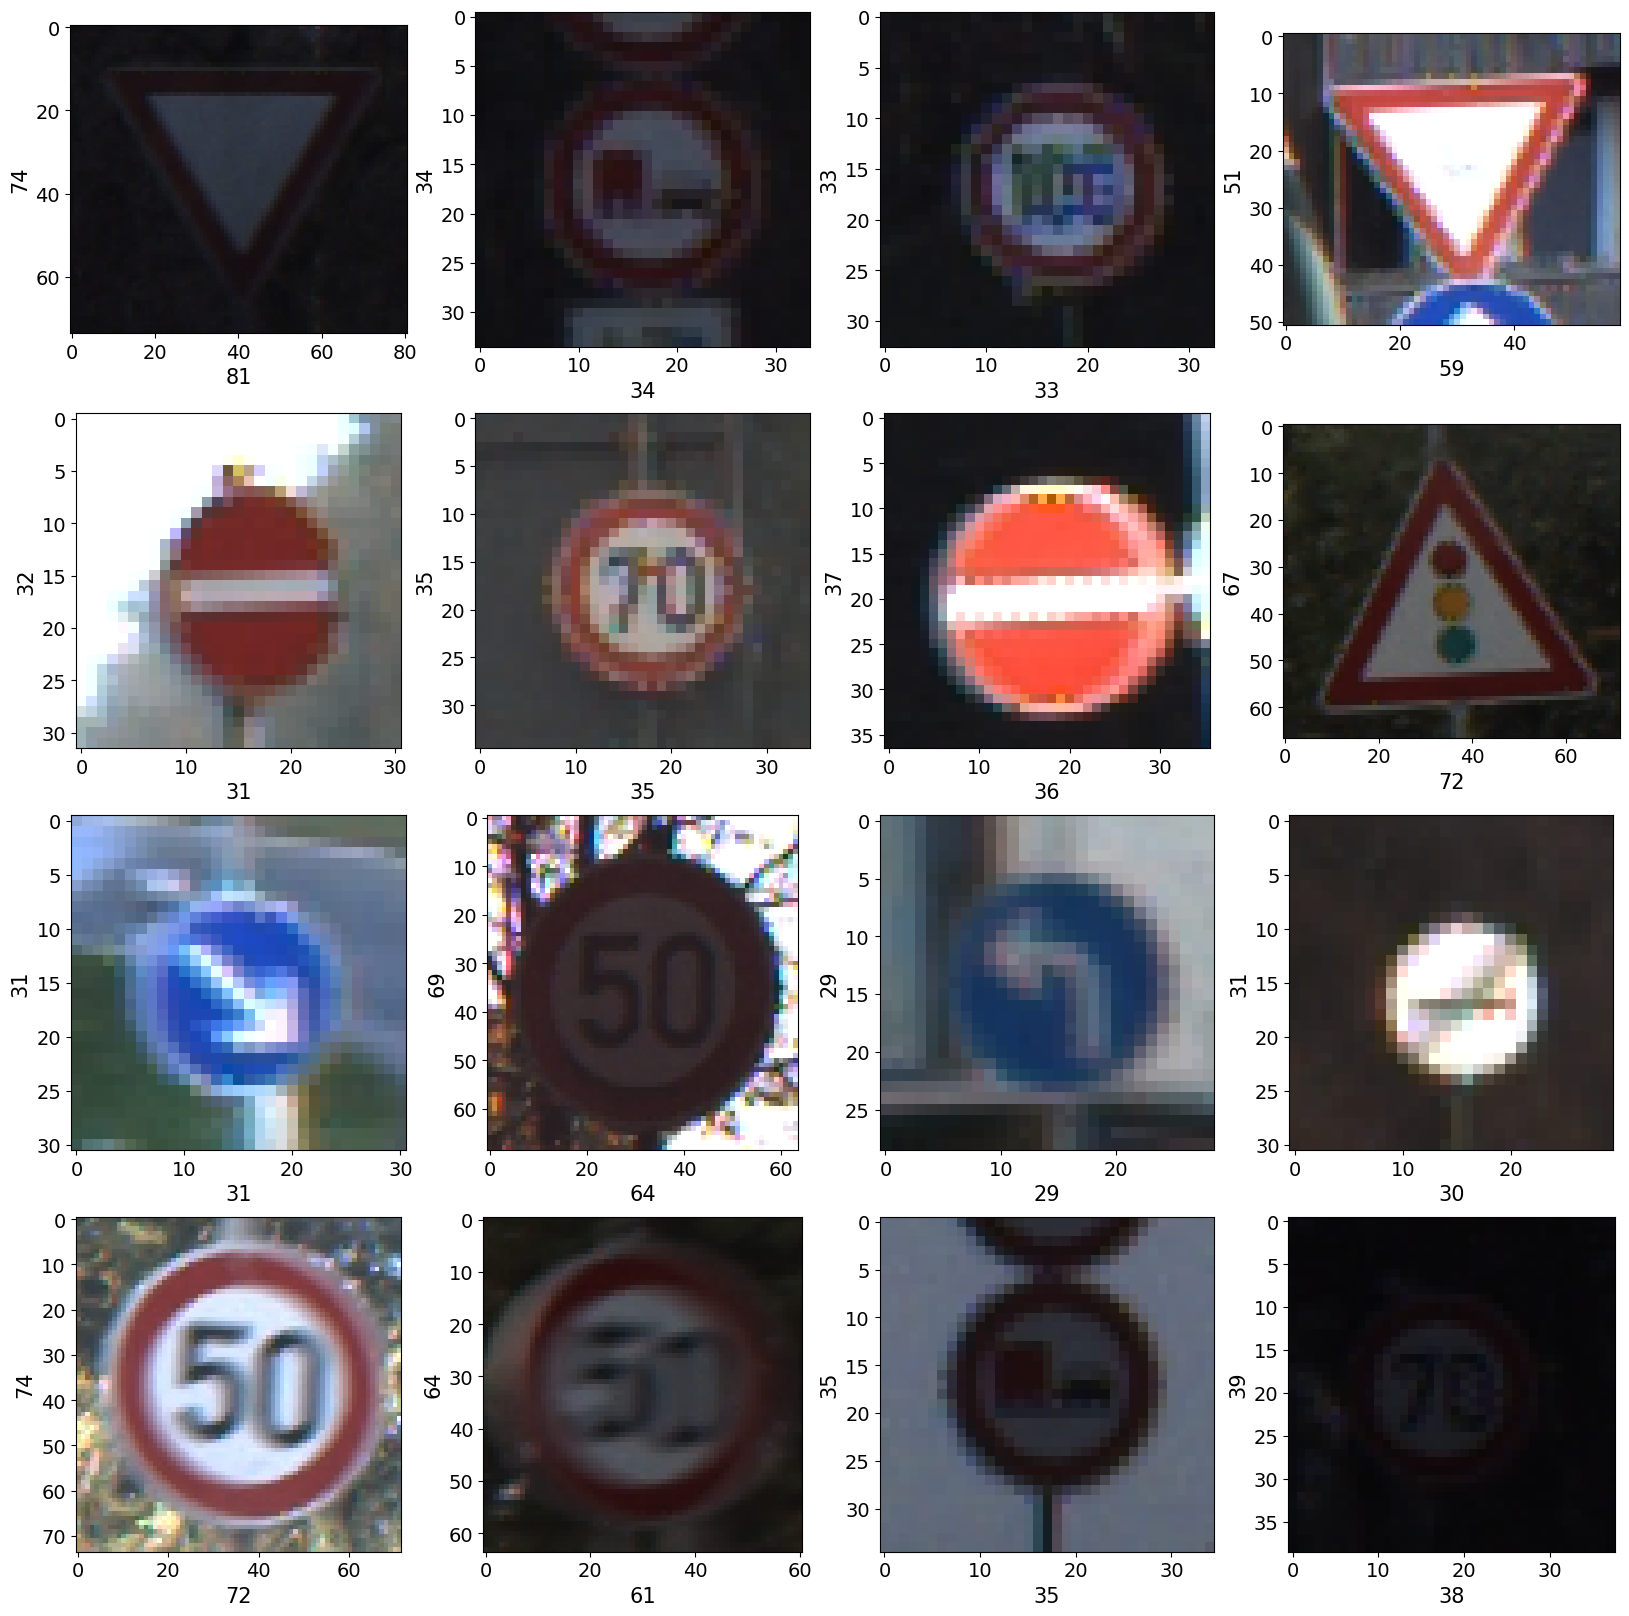

In [ ]:
# Visualizing 25 random images from test data
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir = '/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET'
data1_dir='/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Test'
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(20,20))

for i in range(1,17):
    plt.subplot(4,4,i)
    random_img_path = data1_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize =15)
    plt.ylabel(rand_img.shape[0], fontsize =15)


In [ ]:
datafeeder = train_data.ClassId.value_counts()
datafeeder.sort_index().head()

0     210
1    2220
2    2250
3    1410
4    1980
Name: ClassId, dtype: int64

In [ ]:
# continued from above block
index=datafeeder.index

Text(0, 0.5, 'Number of Images per Category')

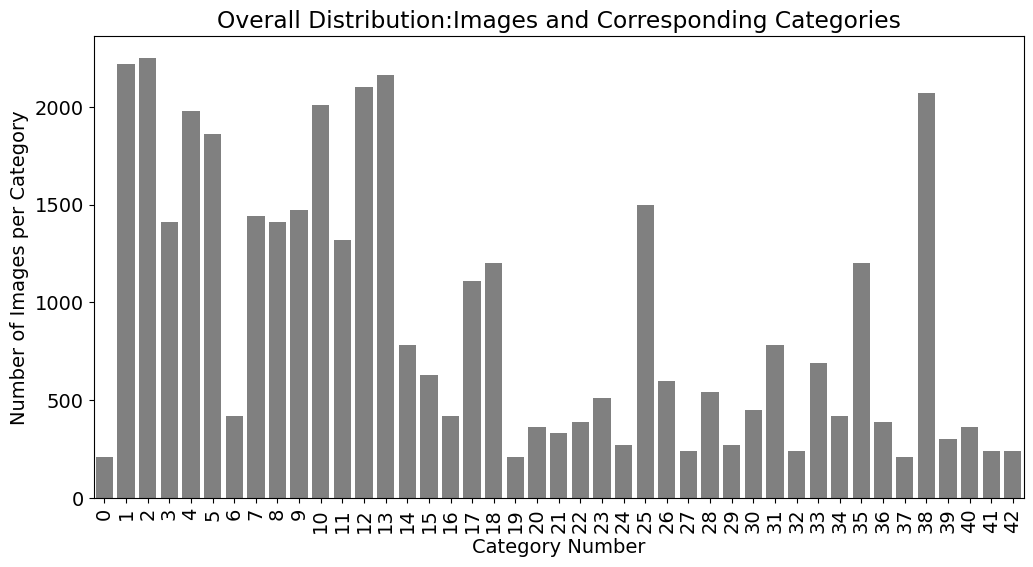

In [ ]:
#Plotting the distribution of images with respect to corresponding category number

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('default')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 5)

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.xlabel('Category Number')

plt.title('Overall Distribution:Images and Corresponding Categories')
sns.barplot(x=datafeeder.index, y=datafeeder,color='grey');
plt.ylabel('Number of Images per Category')

In [ ]:
#Building the base of the training set
import os
import numpy as np
from PIL import Image

image_data = []
image_labels = []
i=0
d4_dir='/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET'

#for each iteration of i, an image is read from the directory path and fed to the list
#Post completion of iterations,the list is converted to n-dimensional numpy arrays

for i in range(43):
    path = d4_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((32,32))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [ ]:
#Using the base above, building a usable training set

from sklearn.model_selection import train_test_split

#splitting up the dataset into training and validaton sets in ratio 90:10
train_X,val_X,train_Y,val_Y=train_test_split(image_data, image_labels, test_size=0.1, random_state=42, shuffle=True)

#Rescaling the pixels by 255 to normalize the same
train_X = train_X/255
val_X = val_X/255
train_X = train_X.reshape((-1, 32,32,3))
val_X = val_X.reshape((-1, 32,32,3))

train_Y = tf.keras.utils.to_categorical(train_Y,43)
val_Y = tf.keras.utils.to_categorical(val_Y, 43)



train_X.shape (35288, 32, 32, 3)
val_X.shape (3921, 32, 32, 3)
train_Y.shape (35288, 43)
val_Y.shape (3921, 43)


In [ ]:
#Setting up the Augmentation for the images in the training dataset
#The above is done to reduce overfitting to the existing data and also to increase model's capability to recognize variations in inputs

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Train'
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator()


In [ ]:
#Defining the parameters of the image generators before they are called during training

train_generator = train_datagen.flow(
     (train_X,train_Y),
     batch_size=32,
     shuffle=True,
     seed=42,
     )

validation_generator = train_datagen.flow(
        (val_X,val_Y),
        batch_size=32,
        shuffle=True,
        seed=42,
        )


In [ ]:
#Defining a model using the Keras Sequential API

model=tf.keras.models.Sequential([
    #1st,2nd convolution layer+max pooling
    tf.keras.layers.Conv2D(32,(2,2), padding="same",strides=(1,1),input_shape=(32,32,3), activation='relu'),
    tf.keras.layers.Conv2D(64,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     #3rd,4th convolution layer+max pooling
    tf.keras.layers.Conv2D(64,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.Conv2D(64,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     #5th,6th convolution layer+max pooling
     tf.keras.layers.Conv2D(64,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.Conv2D(64,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flattening all of them to a single vector of sorts
    tf.keras.layers.Flatten(),
    #1st,2nd fully connected layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #Dropout
    tf.keras.layers.Dropout(0.3),
    #final connected layer
    tf.keras.layers.Dense(43,activation='softmax'),
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
#training
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=15,
      verbose=1,
      validation_data=validation_generator,
      validation_steps=validation_generator.n//validation_generator.batch_size,
      )

Epoch 1/15
1102/1102 [==============================] - 113s 101ms/step - loss: 2.4525 - accuracy: 0.2663 - val_loss: 1.5508 - val_accuracy: 0.4657
Epoch 2/15
1102/1102 [==============================] - 110s 99ms/step - loss: 1.2922 - accuracy: 0.5552 - val_loss: 0.9107 - val_accuracy: 0.6757
Epoch 3/15
1102/1102 [==============================] - 111s 101ms/step - loss: 0.8223 - accuracy: 0.7095 - val_loss: 0.6317 - val_accuracy: 0.7746
Epoch 4/15
1102/1102 [==============================] - 109s 99ms/step - loss: 0.5687 - accuracy: 0.7982 - val_loss: 0.4446 - val_accuracy: 0.8438
Epoch 5/15
1102/1102 [==============================] - 123s 112ms/step - loss: 0.4104 - accuracy: 0.8564 - val_loss: 0.2904 - val_accuracy: 0.8934
Epoch 6/15
1102/1102 [==============================] - 110s 100ms/step - loss: 0.3175 - accuracy: 0.8885 - val_loss: 0.2455 - val_accuracy: 0.9185
Epoch 7/15
1102/1102 [==============================] - 110s 100ms/step - loss: 0.2558 - accuracy: 0.9113 - val_lo

In [ ]:
#Plots the training and validation loss and accuracy

import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r',linewidth=4, label='Training accuracy',marker='s')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linewidth=4,marker='o')
  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss',linewidth=4,marker='s')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss',linewidth=4,marker='o')
  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

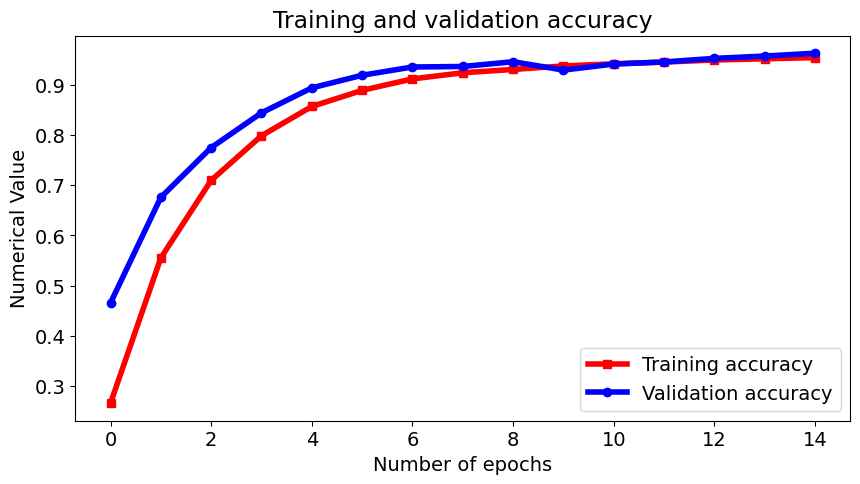

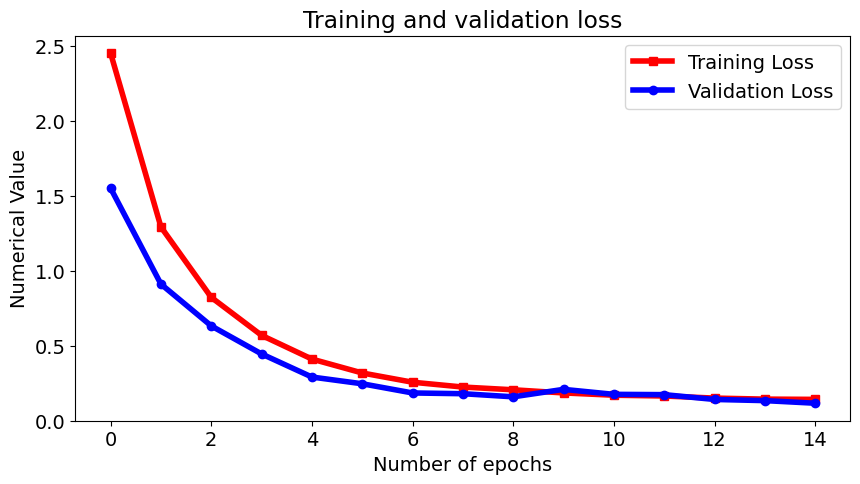

In [ ]:
plot_loss_acc(history)

In [ ]:
#Building the test dataset

import pandas as pd
import cv2
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score

test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Test.csv')
d4_dir='/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET'
d5_dir='/content/drive/MyDrive/Colab Notebooks/GTRSB DATASET/Test'

labels = test_data["ClassId"].values
imgs = test_data["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(d5_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((32,32))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

test_X = np.array(data)
test_X = test_X/255


In [ ]:
#checking model with test dataset

import pandas as pd
import cv2
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score

pred = model.predict(test_X,verbose=1,batch_size=32)
beta=np.argmax(pred,axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, beta)*100)

395/395 [==============================] - 11s 27ms/step
Test Data accuracy:  91.74188440221694


In [ ]:
#creation of a confusion matrix

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, beta)

<Axes: >

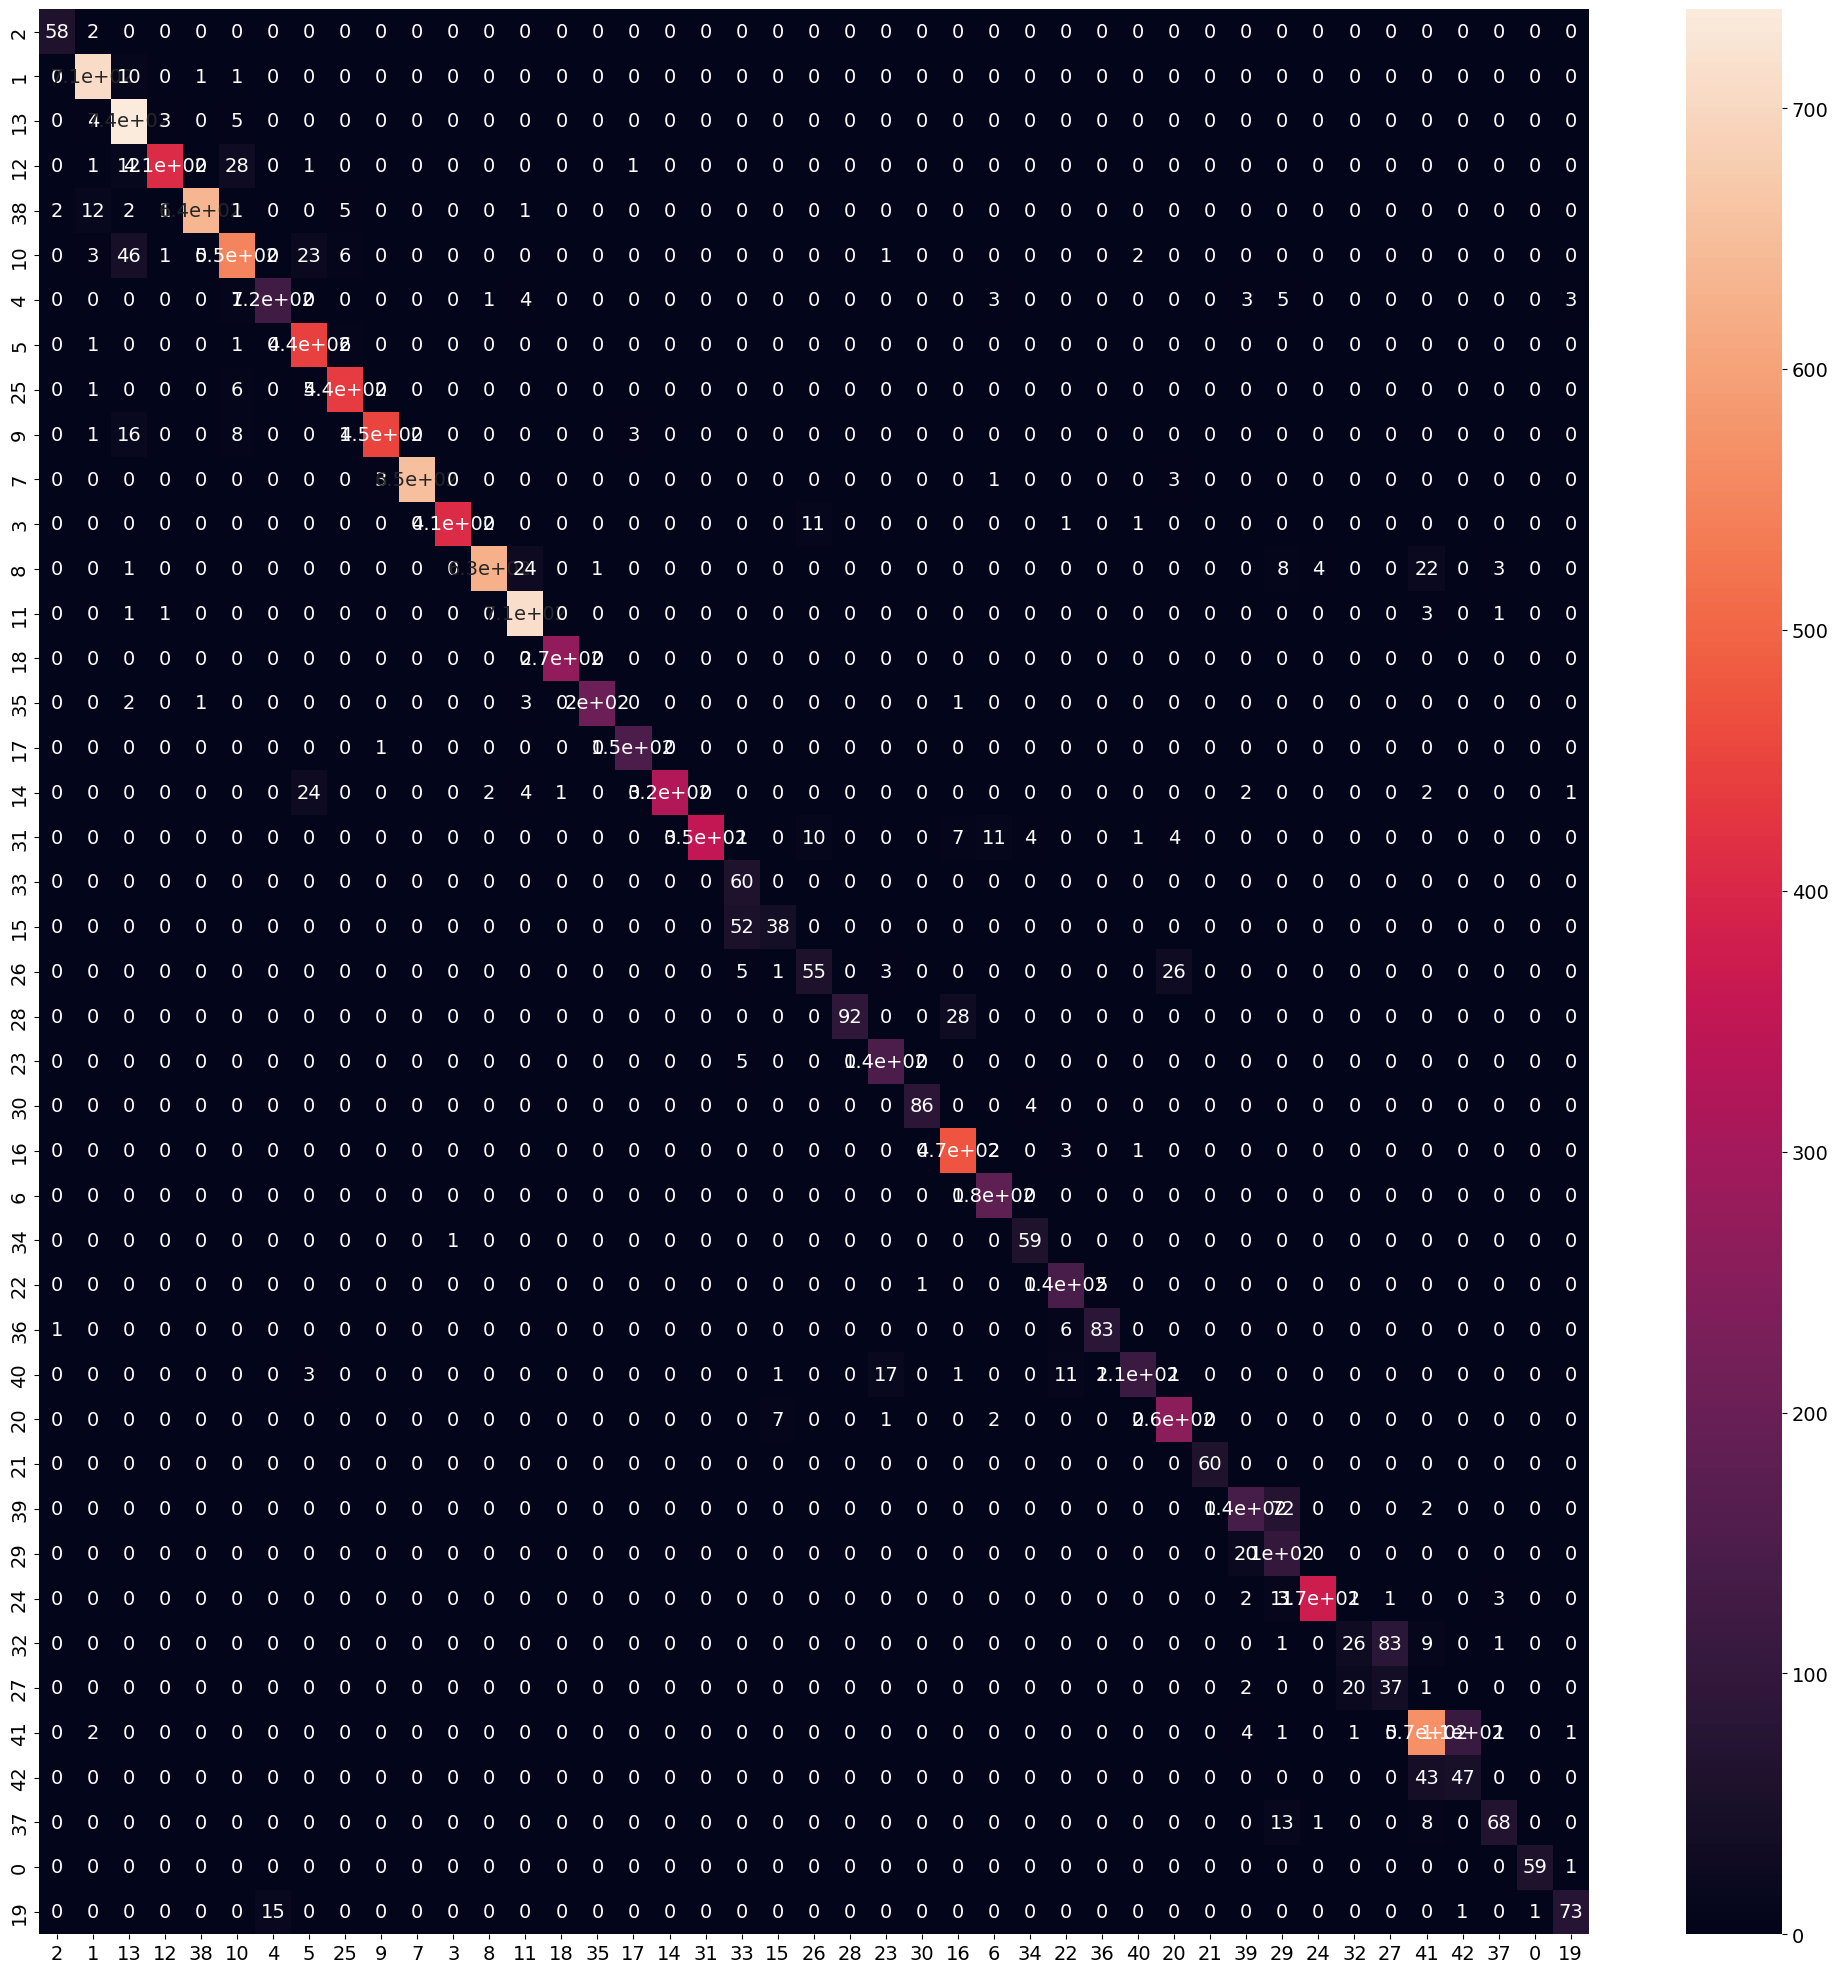

In [ ]:
# continued from above block

import seaborn as sns
datafeeder_cm = pd.DataFrame(cf, index = datafeeder.index,  columns = datafeeder.index)
plt.figure(figsize = (25,25))
sns.heatmap(datafeeder_cm, annot=True)

In [ ]:
#creation of a classification report

from sklearn.metrics import classification_report

print(classification_report(labels, beta))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.96      0.98      0.97       720
           2       0.89      0.98      0.94       750
           3       0.99      0.90      0.94       450
           4       1.00      0.96      0.98       660
           5       0.91      0.87      0.89       630
           6       0.89      0.83      0.86       150
           7       0.89      0.98      0.93       450
           8       0.96      0.97      0.97       450
           9       0.99      0.94      0.96       480
          10       1.00      0.99      0.99       660
          11       1.00      0.97      0.98       420
          12       1.00      0.91      0.95       690
          13       0.95      0.99      0.97       720
          14       1.00      1.00      1.00       270
          15       1.00      0.97      0.98       210
          16       0.97      0.99      0.98       150
          17       1.00    

In [ ]:
# Function that take an input of image,label and return a gradient based out of the loss and image
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        baseloss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
        loss=baseloss(prediction,label)

    gradient = tape.gradient(loss, image)

    signed_grad = tf.sign(gradient)

    signed_grad=signed_grad.numpy()

    return signed_grad

1/1 [==============================] - 0s 56ms/step
Prediction by model of actual image is  12
1/1 [==============================] - 0s 54ms/step


Prediction by model of adverserial image is  12


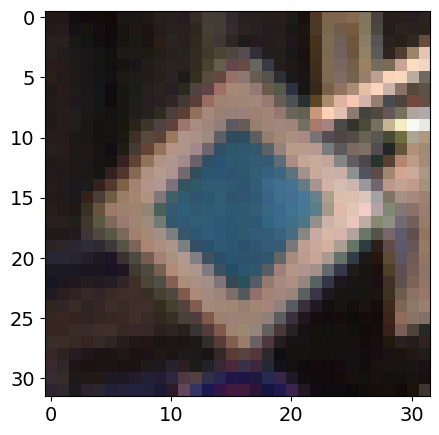

In [ ]:
# Create a single adversarial example

import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

image4=train_X[69]
image_label4=train_Y[69]
eth=image4.reshape((1, 32,32,3))

perturbations = adversarial_pattern(image4.reshape((1, 32,32,3)), image_label4)
adv_image4 = image4 + perturbations * 0.01
qwe1=adv_image4.reshape(32,32,3)

print( 'Prediction by model of actual image is ',model.predict(eth).argmax())
print('Prediction by model of adverserial image is ',model.predict(adv_image4).argmax())

plt.imshow(qwe1)
plt.show()


In [ ]:
#Data generator for adversaries

def generate_adversaries(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            zeta = random.randint(0, 100)

            label = train_Y[zeta]
            image = train_X[zeta]

            perturbations = adversarial_pattern(image.reshape((1,32,32,3)), label)
            epsilon = 0.01

            adv_image = image + perturbations * epsilon

            x.append(adv_image)
            y.append(train_Y[zeta])

        x = np.asarray(x).reshape((batch_size,32,32,3))
        y = np.asarray(y)

        yield x, y

1/1 [==============================] - 0s 27ms/step
Prediction of adverserial image is: 42 Prediction of actual image is: 12


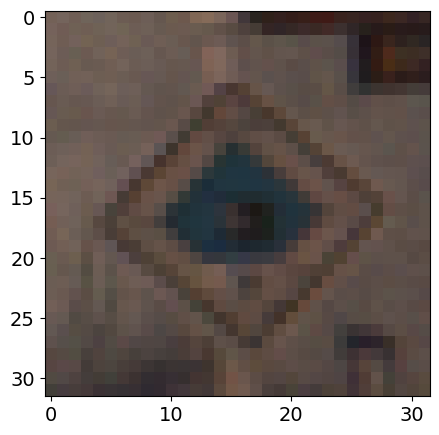

1/1 [==============================] - 0s 15ms/step


Prediction of adverserial image is: 13 Prediction of actual image is: 13


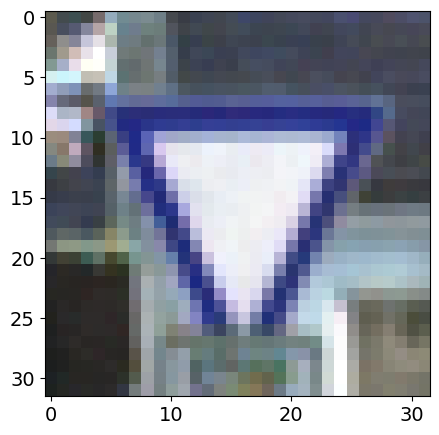

1/1 [==============================] - 0s 15ms/step
Prediction of adverserial image is: 12 Prediction of actual image is: 12


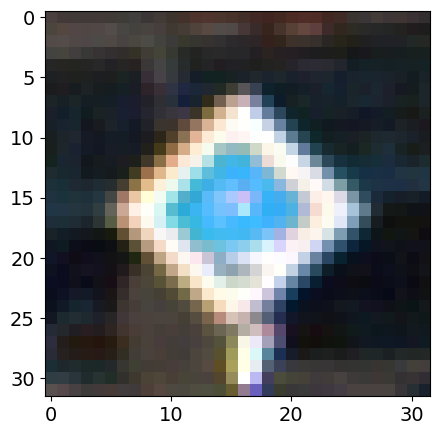

1/1 [==============================] - 0s 17ms/step
Prediction of adverserial image is: 13 Prediction of actual image is: 13


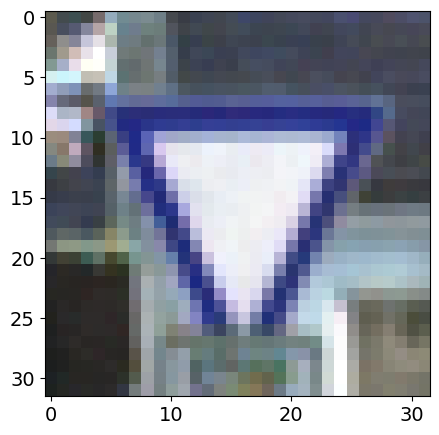

1/1 [==============================] - 0s 16ms/step
Prediction of adverserial image is: 3 Prediction of actual image is: 21


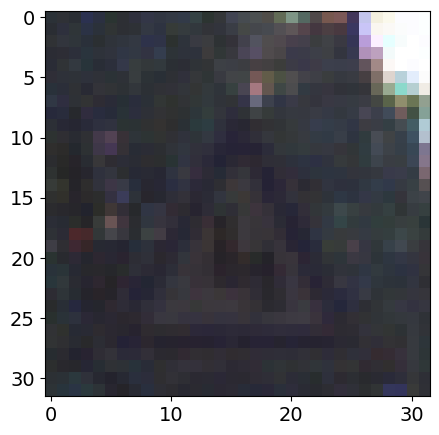

1/1 [==============================] - 0s 17ms/step


Prediction of adverserial image is: 10 Prediction of actual image is: 10


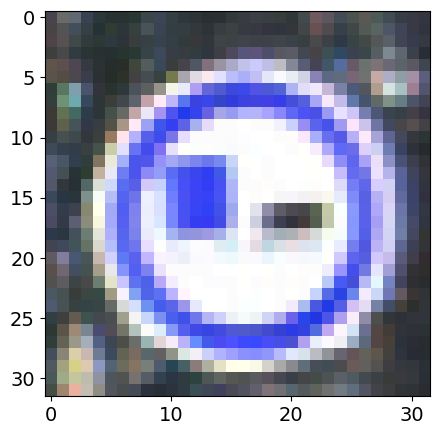

1/1 [==============================] - 0s 16ms/step
Prediction of adverserial image is: 33 Prediction of actual image is: 33


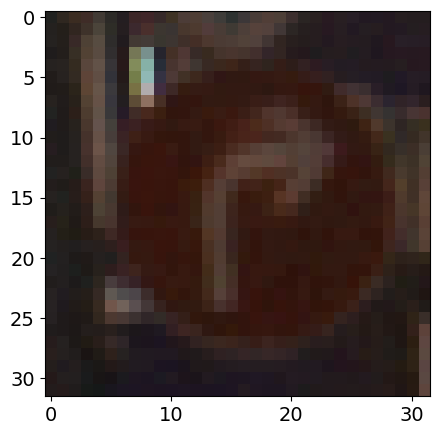

1/1 [==============================] - 0s 17ms/step


Prediction of adverserial image is: 25 Prediction of actual image is: 25


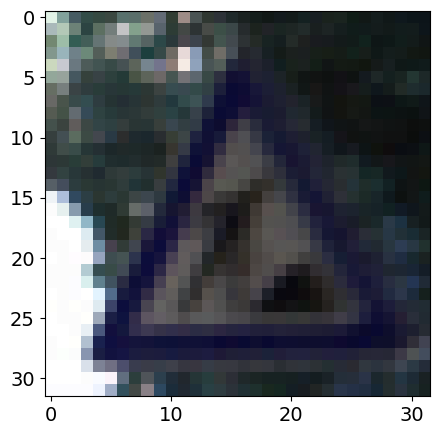

1/1 [==============================] - 0s 16ms/step


Prediction of adverserial image is: 41 Prediction of actual image is: 41


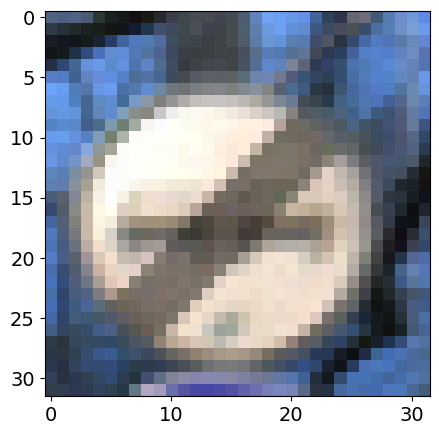

1/1 [==============================] - 0s 20ms/step


Prediction of adverserial image is: 1 Prediction of actual image is: 1


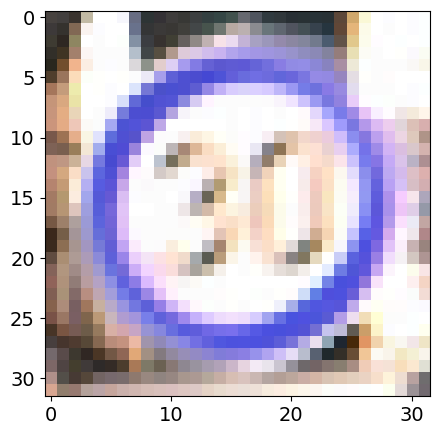

In [ ]:
# Generate and visualize 10 adversarial images

adv_images,m_labels = next(generate_adversaries(10))
for adv_image, m_label in zip(adv_images,m_labels):
    print('Prediction of adverserial image is:',model.predict(adv_image.reshape((1,32,32,3))).argmax(),
          'Prediction of actual image is:',m_label.argmax())
    plt.imshow(adv_image.reshape(32,32,3))
    plt.show()

In [ ]:
# Generate adversarial data

adv_train_X,adv_train_Y = next(generate_adversaries(20000))
adv_val_X,adv_val_Y= next(generate_adversaries(10000))

In [ ]:
# Assess benign model on adversarial data

print('Benign model accuracy on adversarial images:', model.evaluate(x=adv_val_X, y=adv_val_Y, verbose=1))

313/313 [==============================] - 7s 22ms/step - loss: 1.3753 - accuracy: 0.6900
Benign model accuracy on adversarial images: [1.375288486480713, 0.6899999976158142]


In [ ]:
# Learn from adversarial data
model.fit(adv_train_X,adv_train_Y,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(adv_val_X,adv_val_Y))

Epoch 1/10
625/625 [==============================] - 89s 143ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 6.9423e-06 - val_accuracy: 1.0000
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 7.0183e-05 - accuracy: 1.0000 - val_loss: 1.5446e-06 - val_accuracy: 1.0000
Epoch 3/10
625/625 [==============================] - 61s 98ms/step - loss: 2.2562e-05 - accuracy: 1.0000 - val_loss: 6.5660e-07 - val_accuracy: 1.0000
Epoch 4/10
625/625 [==============================] - 73s 118ms/step - loss: 1.4150e-05 - accuracy: 1.0000 - val_loss: 3.2458e-07 - val_accuracy: 1.0000
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 1.1306e-05 - accuracy: 1.0000 - val_loss: 1.9280e-07 - val_accuracy: 1.0000
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 1.1517e-05 - accuracy: 1.0000 - val_loss: 1.0678e-07 - val_accuracy: 1.0000
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 5.7952e-06 -

In [ ]:
# Assess adv.trained model on original test data

print('The accuracy of the adversarial trained model on the original test data is ', model.evaluate(x=test_X,y=pred, verbose=1))

395/395 [==============================] - 9s 22ms/step - loss: 2.2791 - accuracy: 0.7665
The accuracy of the adversarial trained model on the original test data is  [2.2791483402252197, 0.7665083408355713]


In [ ]:
# Assess adv.trained model on new adversarial data

adv_test_X, adv_test_Y = next(generate_adversaries(10000))
print('The accuracy of the adversarial trained model on new adversarial data is', model.evaluate(x=adv_test_X, y=adv_test_Y, verbose=1))

313/313 [==============================] - 8s 26ms/step - loss: 0.7191 - accuracy: 0.8904
The accuracy of the adversarial trained model on new adversarial data is [0.7191261053085327, 0.8903999924659729]


In [ ]:
# Assess adv.trained model on original test data
print('The accuracy of the adversarial trained model on the original test data prediction is ', model.evaluate(x=test_X,y=pred, verbose=1))

395/395 [==============================] - 10s 26ms/step - loss: 2.2791 - accuracy: 0.7665
The accuracy of the adversarial trained model on the original test data prediction is  [2.2791483402252197, 0.7665083408355713]


In [ ]:
# Assess adv.trained model on original test data
#labels = test_data["ClassId"].values

encoded_labels=tf.keras.utils.to_categorical(labels,43)
print('The accuracy of the adversarial trained model on the original test data is ', model.evaluate(x=test_X,y=encoded_labels, verbose=1))

395/395 [==============================] - 9s 22ms/step - loss: 1.5494 - accuracy: 0.7857
The accuracy of the adversarial trained model on the original test data is  [1.5493820905685425, 0.7857482433319092]


In [ ]:
from google.colab import runtime
runtime.unassign()